In [ ]:
### Written by Erfan Panahi (erfan.panahi@ut.ac.ir) 

In [ ]:
!pip install gym[toy_text]
!pip install colorama

In [ ]:
#@title Importing Packages
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [33]:
#@title Functions 
def RandomBased(EPISODE_NUM):
  env = gym.make("Taxi-v3").env
  Reward = np.zeros(EPISODE_NUM)
  Step_size = np.zeros(EPISODE_NUM)
  for episode in range(EPISODE_NUM):
    env.reset()
    while True:
      action = env.action_space.sample()
      state, reward, done, info = env.step(action)
      Reward[episode] += reward
      Step_size[episode] += 1
      if done: break
  return Reward, Step_size

def Result_showing(EPISODE_NUM, Reward, Step_size):
  window_size = 20
  Avg_Reward = Reward / Step_size
  smoothed_Reward = pd.Series(Reward).rolling(window_size , min_periods = window_size).mean()
  smoothed_Step_size = pd.Series(Step_size).rolling(window_size , min_periods = window_size).mean()
  smoothed_Avg_Reward = pd.Series(Avg_Reward).rolling(window_size , min_periods = window_size).mean()
  plt.figure(figsize=(15, 16)) 
  plt.subplot(3, 2, 1)
  plt.plot(Reward)
  plt.xlabel('episode')
  plt.ylabel('Reward')
  plt.title('Reward per episode')
  plt.subplot(3, 2, 2)
  plt.plot(smoothed_Reward)
  plt.xlabel('episode')
  plt.ylabel('Reward')
  plt.title('Smoothed reward per episode')
  plt.subplot(3, 2, 3)
  plt.plot(Step_size)
  plt.xlabel('episode')
  plt.ylabel('Step size')
  plt.title('Step size per episode')
  plt.subplot(3, 2, 4)
  plt.plot(smoothed_Step_size)
  plt.xlabel('episode')
  plt.ylabel('Step size')
  plt.title('Smoothed step size per episode')
  plt.subplot(3, 2, 5)
  plt.plot(Avg_Reward)
  plt.xlabel('episode')
  plt.ylabel('Average Reward')
  plt.title('Average Reward (Reward / Step-size) per episode')
  plt.subplot(3, 2, 6)
  plt.plot(smoothed_Avg_Reward)
  plt.xlabel('episode')
  plt.ylabel('Average Reward')
  plt.title('Smoothed Average Reward (Reward / Step-size) per episode')

def epsilon_greedy(a, epsilon):
  n = len(a)
  a_max = np.argmax(a)
  Pr = 1 - (np.arange(n,0,-1) - 1) * epsilon / n
  Pr[range(n) < a_max] = (np.arange(a_max) + 1) * epsilon / n
  return np.argmax(random.random() < Pr)

def Q_update(ps, a, ns, reward, Q, Q_ns, gamma, alpha):
  new_Q = Q + alpha * (reward + gamma * np.max(Q_ns)  - Q)
  return new_Q

def Q_Learning(EPISODE_NUM, gamma, alpha, epsilon):
  Q_table = np.zeros([500, 6])
  env = gym.make("Taxi-v3").env
  Reward = np.zeros(EPISODE_NUM)
  Step_size = np.zeros(EPISODE_NUM)
  for episode in range(EPISODE_NUM):
    s = env.reset()
    while True:
      # epsilon greedy
      a = epsilon_greedy(Q_table[s], epsilon)
      # next state 
      next_state, reward, done, _ = env.step(a)
      Reward[episode] += reward
      Step_size[episode] += 1
      if (done == 1): break
      # update Q(s,a)
      Q_table[s,a] = Q_update(s, a, next_state, reward, Q_table[s,a], Q_table[next_state], gamma, alpha)
      s = next_state
    epsilon *= 0.9
    alpha *= 0.999
  return Q_table, Reward, Step_size

def Repeated_Q_Learning(EPISODE_NUM, gamma, alpha, Repeat_Num, epsilon):
  Q_table = np.zeros([500, 6])
  Reward = np.zeros(EPISODE_NUM)
  Step_size = np.zeros(EPISODE_NUM)
  for i in range(Repeat_Num):
    Q_table_, Reward_, Step_size_ = Q_Learning(EPISODE_NUM, gamma, alpha, epsilon)
    Q_table += Q_table_ / Repeat_Num
    Reward += Reward_ / Repeat_Num
    Step_size += Step_size_ / Repeat_Num
  return Q_table, Reward, Step_size

def Test_Q_Learning(Q_table):
  env = gym.make("Taxi-v3").env
  Reward = 0; Step_size = 0
  s = env.reset()
  while True:
    plt.figure()
    plt.imshow(env.render(mode = 'rgb_array'))
    a = epsilon_greedy(Q_table[s], epsilon = 0)
    s, reward, done, _ = env.step(a)
    Reward += reward
    Step_size += 1
    if (done == 1): break
  print(f'Step-size = {Step_size}, Reward = {Reward}')

Text(0.5, 0.98, 'Results without using Q-learning (Random steps)')

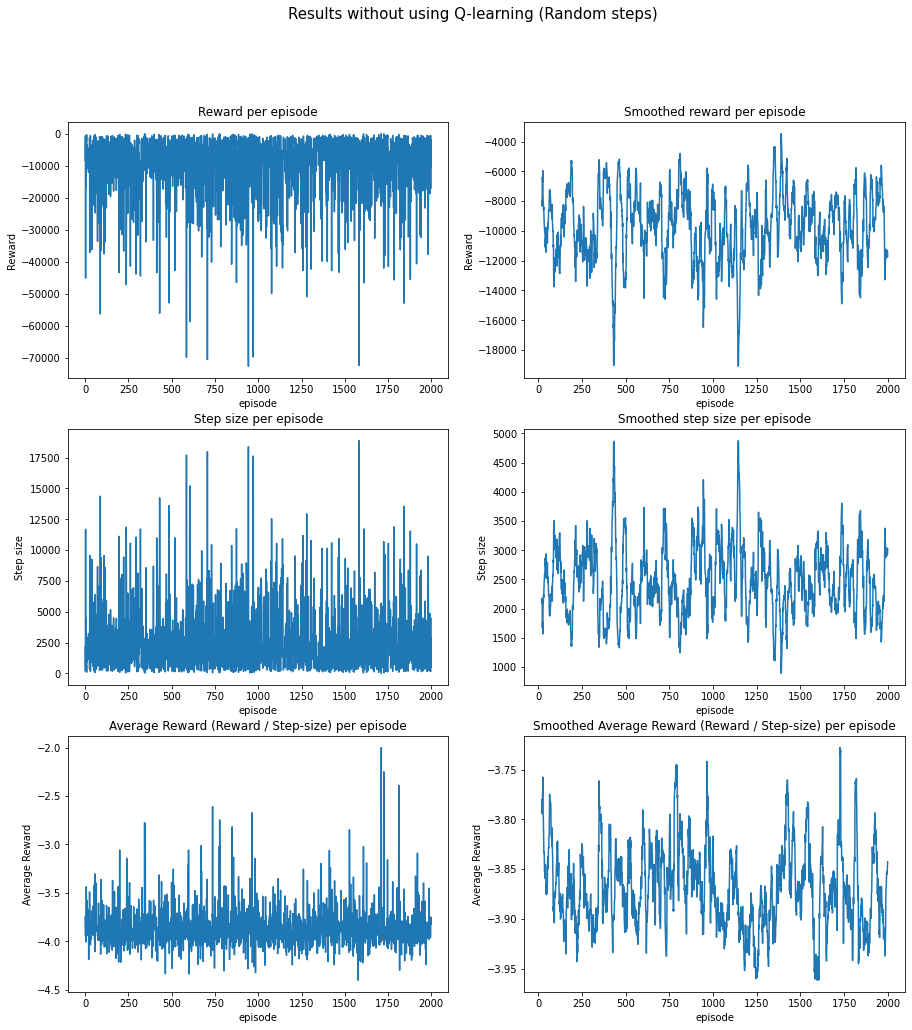

In [32]:
#@title Results without using Q-learning (Random steps)
EPISODE_NUM = 2000
Reward_random, Step_size_random = RandomBased(EPISODE_NUM)
Result_showing(EPISODE_NUM, Reward_random, Step_size_random)
plt.suptitle('Results without using Q-learning (Random steps)', fontsize = 15)

Text(0.5, 0.98, 'Results using Q-learning')

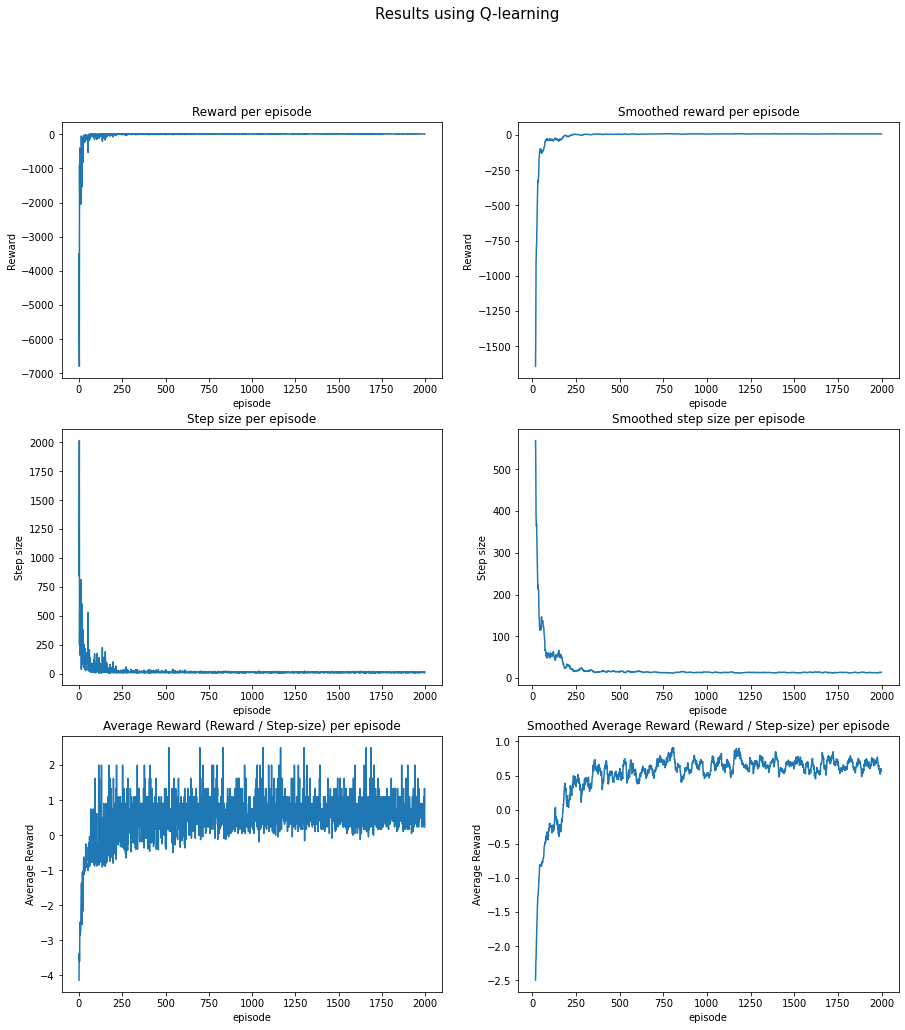

In [39]:
#@title Results using Q-learning
Q_table, Reward_QL, Step_size_QL = Q_Learning(EPISODE_NUM, gamma = 0.9, alpha = 1, epsilon = 1)
Result_showing(EPISODE_NUM, Reward_QL, Step_size_QL)
plt.suptitle('Results using Q-learning', fontsize = 15)

Step-size = 14, Reward = 7


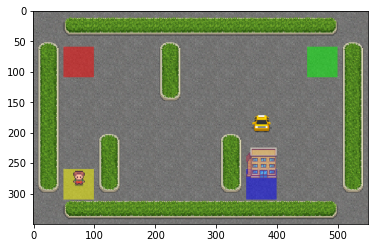

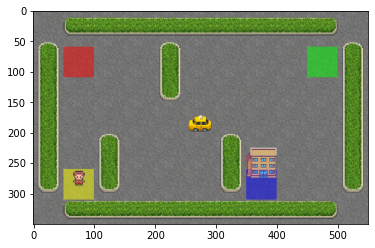

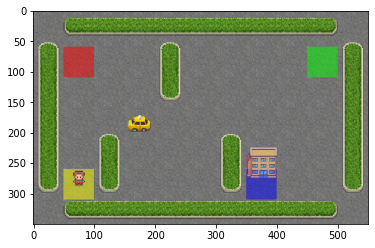

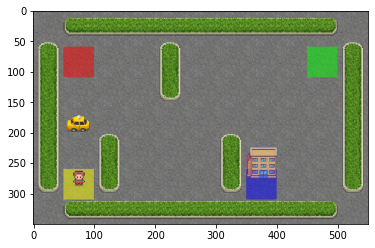

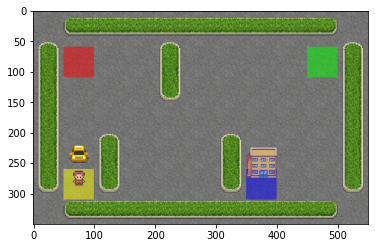

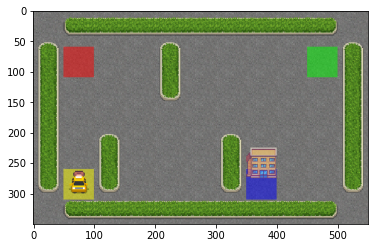

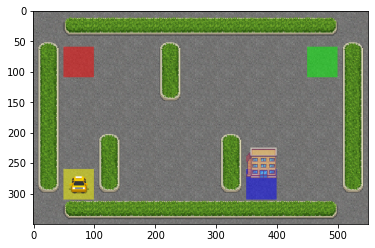

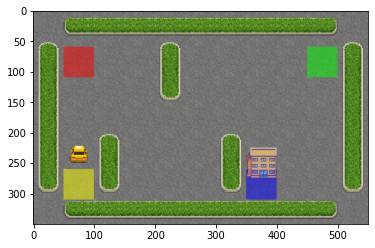

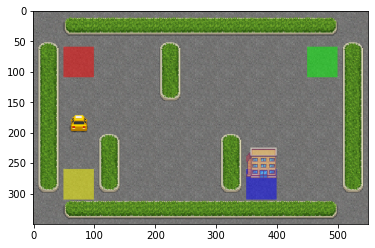

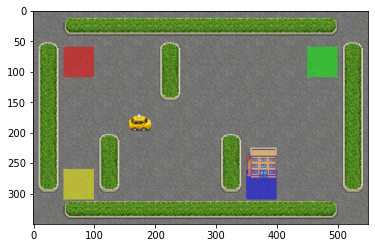

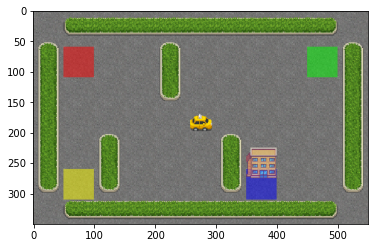

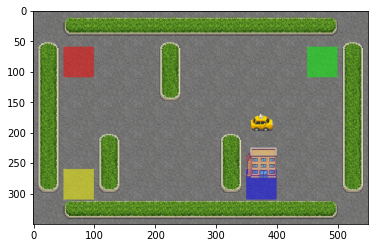

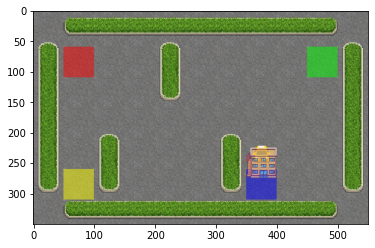

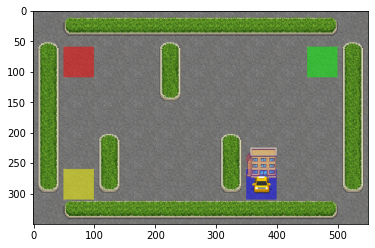

In [40]:
#@title Test and shownig the result graphically
Test_Q_Learning(Q_table)

Text(0.5, 0.98, 'Results using Q-learning')

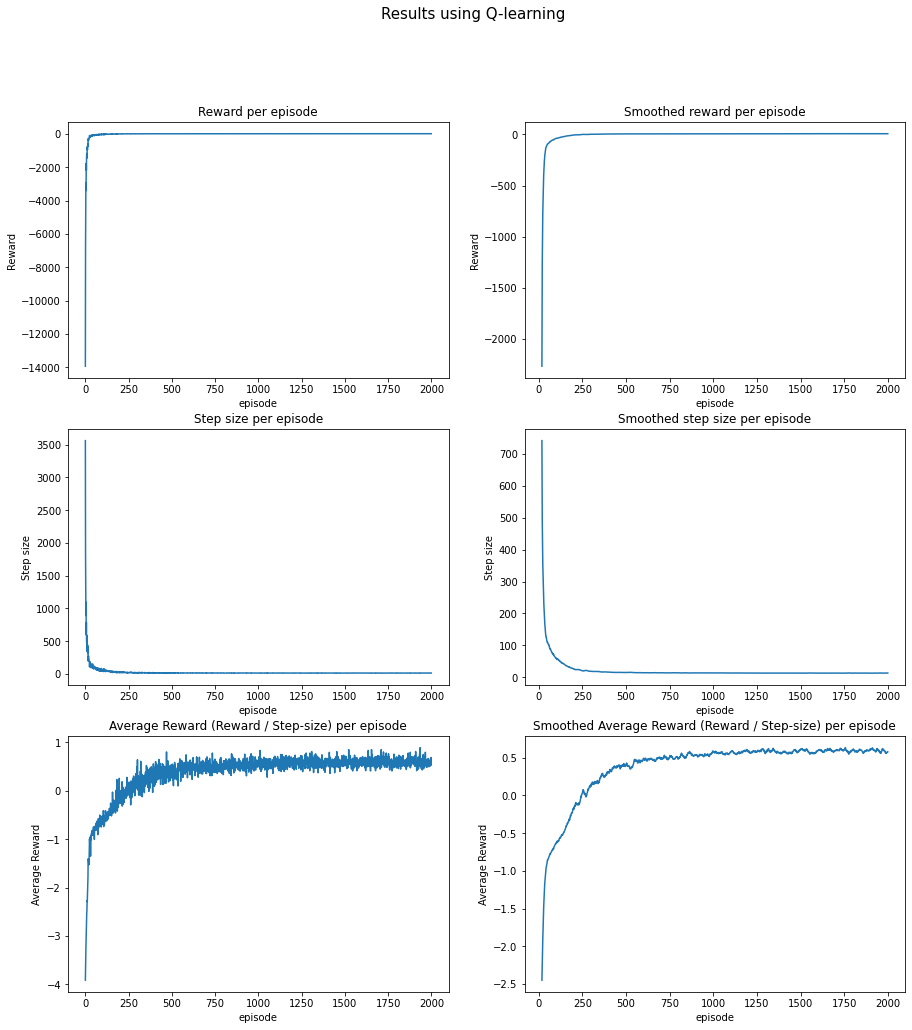

In [41]:
#@title Results using Improved Q-learning
EPISODE_NUM = 2000
Q_table, Reward_QL, Step_size_QL = Repeated_Q_Learning(EPISODE_NUM, gamma = 0.9, alpha = 1, Repeat_Num = 20, epsilon = 1)
Result_showing(EPISODE_NUM, Reward_QL, Step_size_QL)
plt.suptitle('Results using Q-learning', fontsize = 15)

Step-size = 9, Reward = 12


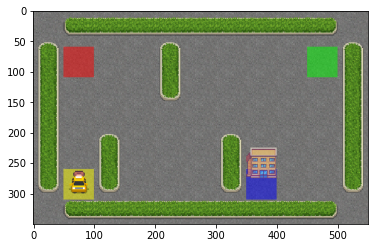

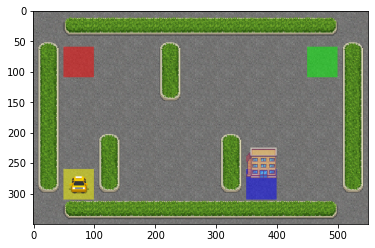

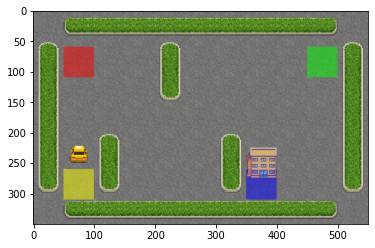

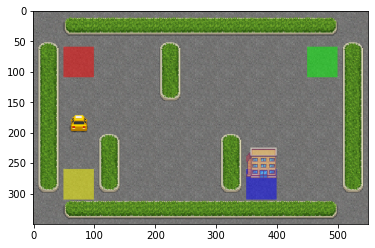

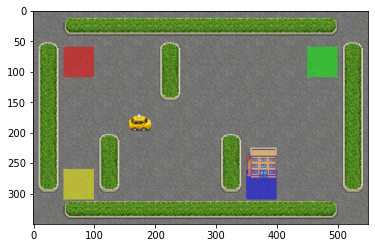

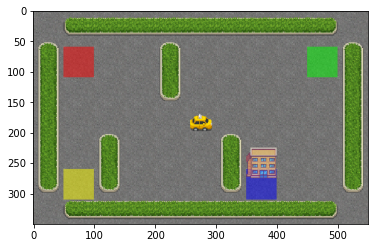

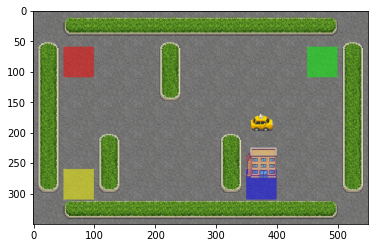

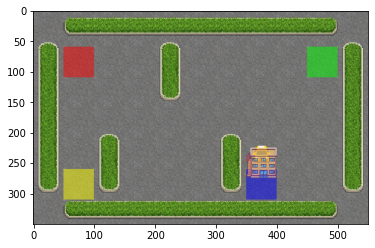

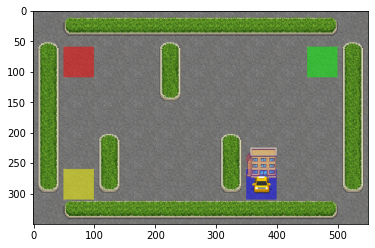

In [42]:
#@title Test and shownig the result graphically
Test_Q_Learning(Q_table)